## Algorytmy

Klasy złożoności (ang. complexity classes)

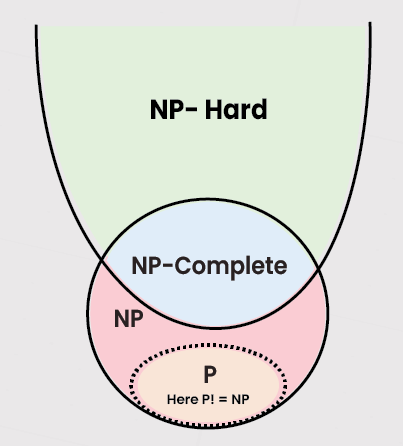

#### P problem

Polynomial Time - problem, który może zostać rozwiązany przez deterministyczną maszynę (maszynę Turinga) w wielomianowym czasie. Rozwiązanie łatwe do znalezienia, sprawdzenie rozwiązania łatwe do znalezienia. Przykłady: greatest common division, merge sort.

#### NP problem

Non-deterministic Polynomial time problem - problem, który może zostać rozwiązany przez niedeterministyczną maszynę w czasie wielomianowym. Rozwiązanie trudne do znalezienia, sprawdzenie łatwe do zrobienia. Przykłady: sudoku, kolorowanie grafów, znalezienie ścieżko hamiltonowskiej.

#### NP-hard problem

Problem np-trudny - problem, który nia ma ani szybkiego rozwiązania, ani nie da się szybko sprawdzić poprawności jego rozwiązania. Przykład: rozwiązanie 

## Algorytm zachłanny

https://pl.wikipedia.org/wiki/Algorytm_zach%C5%82anny

Algorytm zachłanny (ang. greedy algorithm) - algorytm, który dokonuje zachłannego wyboru (optymalnego wyboru) podczas rozwiązywania problemu.

#### Przykład I

Dla zadanej liczby `n` i listy `l` znajdź n liczb, które sumują się do największej wartości.

In [5]:
l = [3, 4, -1, 2, -3, 0]
n = 4

Zachłanne rozwiązanie polegać będzie na wybraniu w każdym kroku wartości maksymalnej aż do otrzymania n liczb.

#### Przykład II

Problem plecakowy (ang. knapsack problem)

https://en.wikipedia.org/wiki/Knapsack_problem

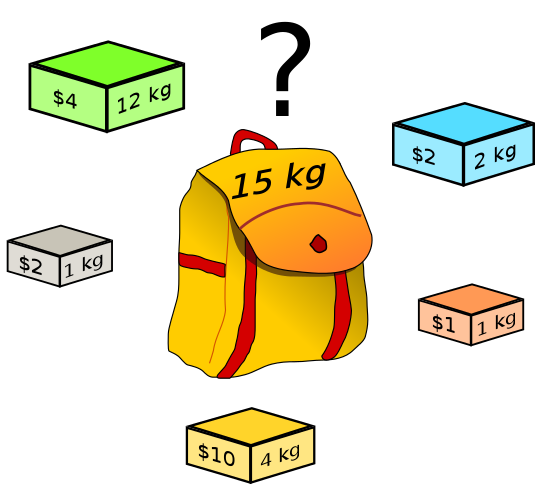

Continuous knapsack problem - wariacja na temat problemu plecakowego

https://en.wikipedia.org/wiki/Continuous_knapsack_problem

Capacity = 25

|Item|Size|Value|
|---|---|---|
|0|22|19|
|1|10|9|
|2|9|9|
|3|7|6|

Zachłanne rozwiązanie w oparciu o jedną kolumnę:
- size (od dołu)
- value (od góry)

Rozwiązanie zachłanne nie będzie rozwiązaniem optymalnym, ale na tym przykładzie dobrze widać czym jest zachłanne podejście.

Ale mimo to ten problem może być rozwiązany za pomocą zachłannego algorytmu. Dostawmy jeszcze jedną kolumnę.

Capacity = 25

|Item|Size|Value|$\frac{Value}{Size}$|
|---|---|---|---|
|0|22|19|0.8636|
|1|10|9|0.9|
|2|9|9|1|
|3|7|6|0.857|

Elementy, które mają największą wartość $\frac{Value}{Size}$ to optymalne elementy do wzięcia z punktu widzenia naszego problemu. 

Z tabelki widzimy, że optymalnymi elementami do wzięcia są w kolejności: 2, 1, 0, 3. W oparciu o kolumnę $\frac{Value}{Size}$ zachłanny algorytm zwróci optymalne rozwiązanie.

Przykład pokazuje jak ważne jest w algorytmie zachłannym tzw. kryterium zachłanności.

Algorytm zachłanny zawiedzie przy próbie rozwiązania klasycznego problemu plecakowego.

Capacity = 25

|Item|Size|Value|$\frac{Value}{Size}$|
|---|---|---|---|
|0|22|19|0.8636|
|1|10|9|0.9|
|2|9|9|1|
|3|7|6|0.857|

Bierzemy item 2, item 1, otrzymujemy:

|Size|Value|
|---|---|
|19|18|

i dalej nie pójdziemy.

Dlaczego tym razem nie zadziałał? 

Bo w klasycznym problemie plecakowym, to jaką decyzje podejmiemy determinuje przyszłe decyzje, decyzje które będziemy podejmowali w kolejnych krokach.

### Algorytm siłowy
https://www.youtube.com/watch?v=ig-dtw8Um_k

Brute-force algorithm - algorytm polegający na sprawdzeniu wszystkich możliwych rozwiązań.

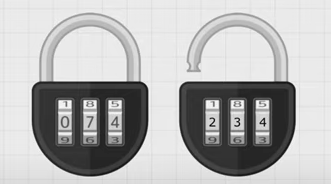

Zostając przy klasycznym problemie plecakowym, jak wyglądać będzie jego rozwiązanie siłowe?

Testujemy wszystkie możliwe kombinacje. Odrzucamy te, które się nie zmieszczą. Z tych które się zmieszczą wybieramy ten o nawiększej wartości.

Złożoność obliczeniowa rozwiązania siłowego: $O(n\cdot 2^{n})$

### Programowanie dynamiczne

Dynamic programming - jest to technika poprawiania wydajności algorytmu poprzez przechowywanie wyników pośrednich. Działa świetnie, kiedy wiemy że nasz algorytm podczas obliczania rozwiązania wykonuje wiele razy te same obliczenia. Dynamiczne programowanie polega na stworzniu miejsca, w którym algorytm będzie mógł zapisać wynik pośredni po pierwszym wyliczeniu. Po zapisaniu, każde następne jego wyliczenie będzie polegało na odwołaniu się do zapisanej wartości zamiast liczenia tego samego jeszcze raz.



W krótkich słowach programowanie dynamiczne to technika cachowania wyników pośrednich.

Przykład - ciąg fibonnaciego z wykorzystaniem memoizacji

https://en.wikipedia.org/wiki/Fibonacci_sequence

Klasyczne rekurencyjne rozwiązanie:

In [17]:
def fib(n):
    if n==1:
        result = 0
    elif n==2:
        result = 1
    else:
        result = fib(n-1) + fib(n-2)

    return result

In [18]:
fib(5)

3

Rozwiązanie działa, ale jest bardzo powolne $O(n^2)$.

In [19]:
%timeit fib(30)

156 ms ± 15.7 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


Dlaczego?

Ogólnie $O(2^n)$, ale jedno spojrzenie na drzewo wywołań rekurencyjnych powie nam więcej.

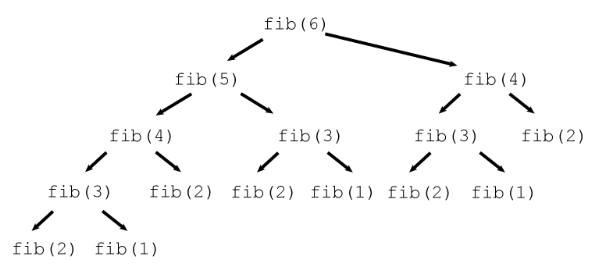

Ile razy liczyliśmy `fib(1)`?

3

W ogólności

|wywołanie|Liczba powtórzeń|
|---|---|
|fib(1)|3|
|fib(2)|5|
|fib(3)|3|
|fib(4)|2|
|fib(5)|1|
|fib(6)|1|


I liczba powtórzeń będzie wybuchać wraz ze wzrostem n. Czy nie lepiej zapisać zapisać te wyliczenia po pierwszym razie i potem odwoływać się już do wyliczonej wartości?

Tylko jak?

In [24]:
def fib_dyn(n, memo):
    if n in memo:
        return memo[n]
    if n==1:
        result = 0
    elif n==2:
        result = 1
    else:
        result = fib_dyn(n-1, memo) + fib_dyn(n-2, memo)

    memo[n] = result
    return result

In [26]:
%timeit fib_dyn(30, dict())

8.02 μs ± 540 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


Teraz potrzebowaliśmy tylko raz wyliczyć każde z wywołań. Po krótkiej analizie można dojść do wniosku, że przeszliśmy z rozwiązaniem do $O(n)$.